In [1]:
import fiftyone.zoo as foz
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import pandas as pd

Загрузка данных из датасета COCO

In [4]:
# Загрузка тренировочной выборки
train_dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=["detections"],
    classes=["person"],
    max_samples=500,
)

# Загрузка валидационной выборки
val_dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["detections"],
    classes=["person"],
    max_samples=100,
)

 100% |██████|    1.9Gb/1.9Gb [6.4m elapsed, 0s remaining, 8.7Mb/s]       
Extracting annotations to 'C:\Users\user\fiftyone\coco-2017\raw\instances_train2017.json'
 100% |██████████████████| 500/500 [41.1s elapsed, 0s remaining, 7.1 images/s]       
Writing annotations for 500 downloaded samples to 'C:\Users\user\fiftyone\coco-2017\train\labels.json'
Dataset info written to 'C:\Users\user\fiftyone\coco-2017\info.json'
Loading existing dataset 'coco-2017-train-500'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
Found annotations at 'C:\Users\user\fiftyone\coco-2017\raw\instances_val2017.json'
 100% |██████████████████| 100/100 [8.4s elapsed, 0s remaining, 10.7 images/s]      
Writing annotations for 100 downloaded samples to 'C:\Users\user\fiftyone\coco-2017\validation\labels.json'
Dataset info written to 'C:\Users\user\fiftyone\coco-2017\info.json'
Loading existing dataset 'coco-2017-validation-100'. To reload from disk, either delet

Определение параметров аугментации

In [2]:
augmentation_params = {
    'augment': True,
    'mosaic': 0.5,  # Использование метода Mosaic для аугментации
    'mixup': 0.5    # Использование метода MixUp для аугментации
}

Загрузка предварительно обученной модели YOLOv10

In [26]:
model = YOLO('yolov10n.pt')

Обучение модели

In [27]:
results = model.train(
    data='coco_person.yaml',  # Файл конфигурации
    epochs=30,               # Количество эпох
    imgsz=640,               # Размер изображения
    batch=16,                # Размер батча
    optimizer='Adam',        # Оптимизатор
    lr0=0.001,               # Начальная скорость обучения
    **augmentation_params    # Параметры аугментации
)

Ultralytics 8.3.49  Python-3.11.9 torch-2.5.1+cpu CPU (AMD Ryzen 7 8845HS w/ Radeon 780M Graphics)
engine\trainer: task=detect, mode=train, model=yolov10n.pt, data=coco_person.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

train: Scanning C:\Anna\Workspace\ai\curs_work\datasets\fiftyone\coco-2017\train.cache... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<?, ?it/s]
val: Scanning C:\Anna\Workspace\ai\curs_work\datasets\fiftyone\coco-2017\validation.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

Plotting labels to runs\detect\train10\labels.jpg... 


optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train10
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      3.385      4.977      3.025         41        640: 100%|██████████| 32/32 [01:57<00:00,  3.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.97s/it]

                   all        100        477    0.00467      0.291     0.0901     0.0449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      3.355      4.343      3.057         44        640: 100%|██████████| 32/32 [02:09<00:00,  4.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

                   all        100        477      0.481      0.184      0.224      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      3.541      4.238       3.11         39        640: 100%|██████████| 32/32 [02:11<00:00,  4.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

                   all        100        477      0.546      0.184      0.236      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      3.518      4.204      3.102         32        640: 100%|██████████| 32/32 [02:08<00:00,  4.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.96s/it]

                   all        100        477      0.374      0.325       0.28      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      3.575      4.181      3.192         38        640: 100%|██████████| 32/32 [02:10<00:00,  4.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.93s/it]

                   all        100        477      0.389      0.396      0.293      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      3.592      4.189      3.156         51        640: 100%|██████████| 32/32 [02:10<00:00,  4.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.94s/it]

                   all        100        477      0.358      0.331      0.255       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      3.469      4.094      3.142         54        640: 100%|██████████| 32/32 [02:05<00:00,  3.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

                   all        100        477      0.401      0.373      0.325      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      3.458      3.933      3.104         33        640: 100%|██████████| 32/32 [02:28<00:00,  4.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.30s/it]

                   all        100        477      0.445      0.436      0.382      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G      3.452      3.941      3.027         27        640: 100%|██████████| 32/32 [02:07<00:00,  3.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.75s/it]

                   all        100        477      0.457      0.382      0.347      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      3.378      3.887       3.06         43        640: 100%|██████████| 32/32 [02:14<00:00,  4.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.38s/it]

                   all        100        477      0.491      0.388      0.363      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G      3.313      3.747      3.024         26        640: 100%|██████████| 32/32 [02:36<00:00,  4.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.33s/it]

                   all        100        477        0.5      0.412      0.401      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G      3.295      3.802      3.028         18        640: 100%|██████████| 32/32 [02:19<00:00,  4.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.76s/it]

                   all        100        477      0.463      0.374      0.389      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      3.241      3.707      2.978         51        640: 100%|██████████| 32/32 [01:57<00:00,  3.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]

                   all        100        477      0.485      0.405      0.407      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G      3.181      3.611      2.935         71        640: 100%|██████████| 32/32 [01:59<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.86s/it]

                   all        100        477      0.573      0.432      0.476      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G      3.294       3.56      2.926         31        640: 100%|██████████| 32/32 [02:17<00:00,  4.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.77s/it]

                   all        100        477      0.497      0.472      0.471      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G      3.196      3.539      2.911         53        640: 100%|██████████| 32/32 [02:24<00:00,  4.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.75s/it]

                   all        100        477      0.564      0.424      0.466      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G      3.203      3.549      2.901         47        640: 100%|██████████| 32/32 [02:03<00:00,  3.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.30s/it]

                   all        100        477      0.574       0.44       0.49      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      3.122      3.415      2.853         38        640: 100%|██████████| 32/32 [01:59<00:00,  3.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.80s/it]

                   all        100        477      0.576      0.434      0.486      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G      3.134      3.441      2.858         24        640: 100%|██████████| 32/32 [02:09<00:00,  4.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.80s/it]

                   all        100        477      0.523      0.484      0.503      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G      3.101      3.326      2.797         48        640: 100%|██████████| 32/32 [01:57<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]

                   all        100        477      0.594      0.451      0.499      0.273


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G      2.593       3.02      2.456         31        640: 100%|██████████| 32/32 [01:50<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.81s/it]

                   all        100        477       0.59      0.398       0.47      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G      2.592       2.79      2.499         31        640: 100%|██████████| 32/32 [02:13<00:00,  4.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.30s/it]

                   all        100        477      0.602      0.444      0.495      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G      2.548      2.622      2.434         10        640: 100%|██████████| 32/32 [02:24<00:00,  4.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.40s/it]

                   all        100        477       0.65      0.459      0.525      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G      2.562      2.628      2.446          8        640: 100%|██████████| 32/32 [01:52<00:00,  3.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.80s/it]

                   all        100        477      0.639      0.465      0.537      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G      2.413      2.444      2.367          9        640: 100%|██████████| 32/32 [01:49<00:00,  3.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.82s/it]

                   all        100        477      0.633      0.468      0.536      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G       2.35      2.452      2.376          6        640: 100%|██████████| 32/32 [01:49<00:00,  3.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.78s/it]

                   all        100        477      0.594       0.47      0.514      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G      2.419      2.325      2.331         19        640: 100%|██████████| 32/32 [01:51<00:00,  3.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]

                   all        100        477      0.577      0.509      0.534      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G      2.362      2.337      2.321          7        640: 100%|██████████| 32/32 [01:50<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]

                   all        100        477      0.618      0.491      0.544      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G      2.238      2.234      2.297         24        640: 100%|██████████| 32/32 [01:51<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.78s/it]

                   all        100        477      0.636      0.473      0.549      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G      2.301      2.191      2.269         18        640: 100%|██████████| 32/32 [01:52<00:00,  3.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.78s/it]

                   all        100        477      0.589      0.514      0.554      0.309



30 epochs completed in 1.128 hours.
Optimizer stripped from runs\detect\train10\weights\last.pt, 5.7MB
Optimizer stripped from runs\detect\train10\weights\best.pt, 5.7MB

Validating runs\detect\train10\weights\best.pt...
Ultralytics 8.3.49  Python-3.11.9 torch-2.5.1+cpu CPU (AMD Ryzen 7 8845HS w/ Radeon 780M Graphics)
YOLOv10n summary (fused): 285 layers, 2,694,806 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]

WARNING  Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:01<00:04,  1.47s/it]

WARNING  Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:03<00:03,  1.65s/it]

WARNING  Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [00:05<00:01,  1.91s/it]

WARNING  Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.42s/it]


                   all        100        477      0.589      0.514      0.554      0.309
Speed: 0.7ms preprocess, 47.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\detect\train10


Построение графиков

In [28]:
results = pd.read_csv('runs/detect/train10/results.csv')

metrics_to_plot = [
    'metrics/precision(B)', 'metrics/recall(B)',
    'metrics/mAP50(B)', 'metrics/mAP50-95(B)'
]

plt.figure(figsize=(14, 8))

for metric in metrics_to_plot:
    plt.plot(results[metric], label=metric)

plt.title('Графики метрик обучения')
plt.xlabel('Эпохи')
plt.ylabel('Значение метрики')
plt.legend()
plt.grid(True)

plt.savefig('metrics_plot.png')

Визуализация результатов


image 1/1 c:\Anna\Workspace\ai\curs_work\datasets\fiftyone\coco-2017\test\000000000448.jpg: 448x640 4 persons, 49.5ms
Speed: 0.0ms preprocess, 49.5ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


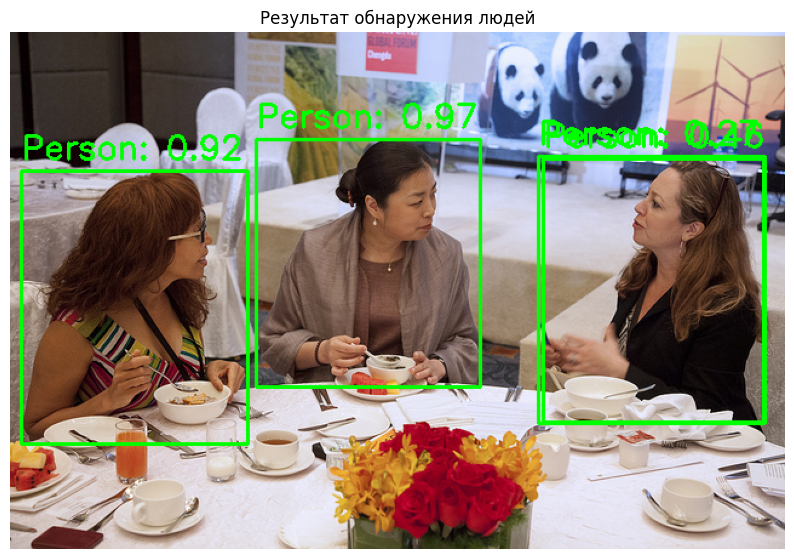

In [4]:
trained_model = YOLO('runs/detect/train10/weights/best.pt')
test_image = 'datasets/fiftyone/coco-2017/test/000000000448.jpg'
results = trained_model(test_image)

# Отрисовка боксов на изображении
for result in results:
    image = cv2.imread(test_image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0]  # Координаты ограничивающей рамки
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        confidence = box.conf[0].item()  # Уверенность в предсказании
        class_id = box.cls[0].item()  # ID класса

        # Отрисовка рамки
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        label = f"Person: {confidence:.2f}"
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.title("Результат обнаружения людей")
    plt.savefig('resultt.png')